In [1]:
import networkx as nx
import numpy as np
import matplotlib.pylab as plt       
%matplotlib inline
from matplotlib.pyplot import title,xlabel,ylabel,show

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt') 
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)

In [4]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)

In [5]:
160-len(list(set(imalos)))

134

In [6]:
malos=list(set(imalos))
malos=np.sort(malos)

In [7]:
F1=np.delete(F1, malos, axis=0)
F1=np.delete(F1,malos,axis=1)
F2=np.delete(F2, malos, axis=0)
F2=np.delete(F2,malos,axis=1)
F3=np.delete(F3, malos, axis=0)
F3=np.delete(F3,malos,axis=1)

In [8]:
g1=nx.from_numpy_matrix(F1,create_using=nx.DiGraph())
g2=nx.from_numpy_matrix(F2,create_using=nx.DiGraph())
g3=nx.from_numpy_matrix(F3,create_using=nx.DiGraph())


# Visualización

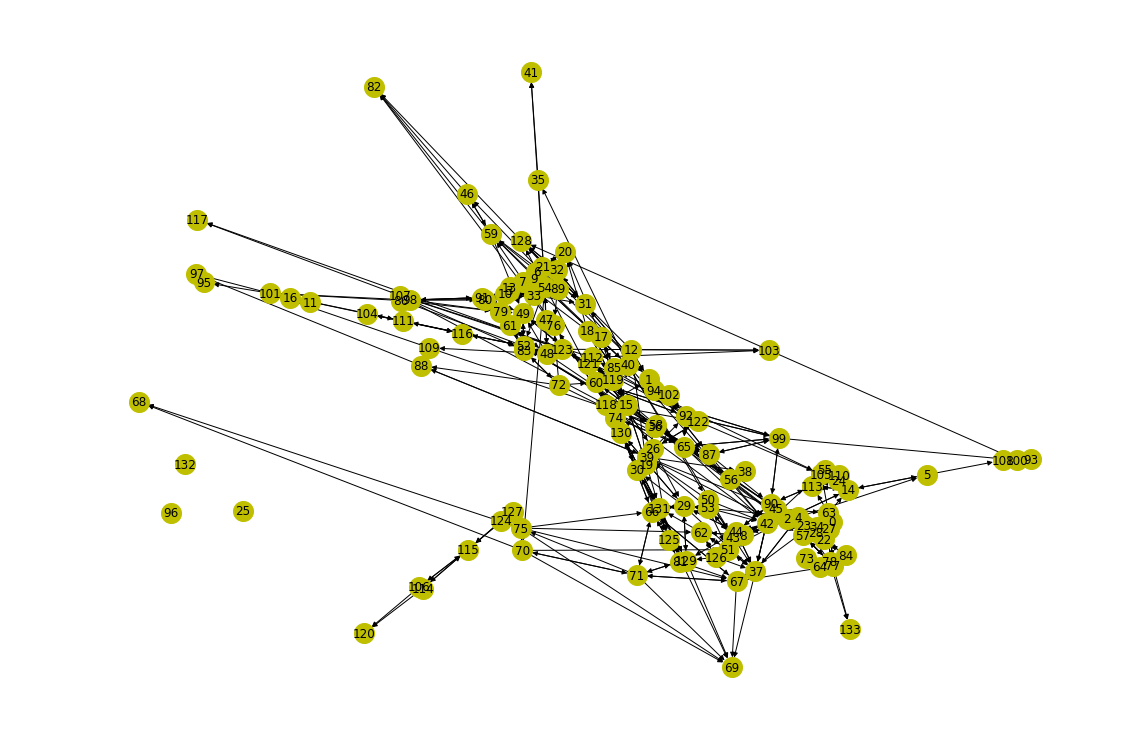

In [9]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g1) 
        
nx.draw(g1,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

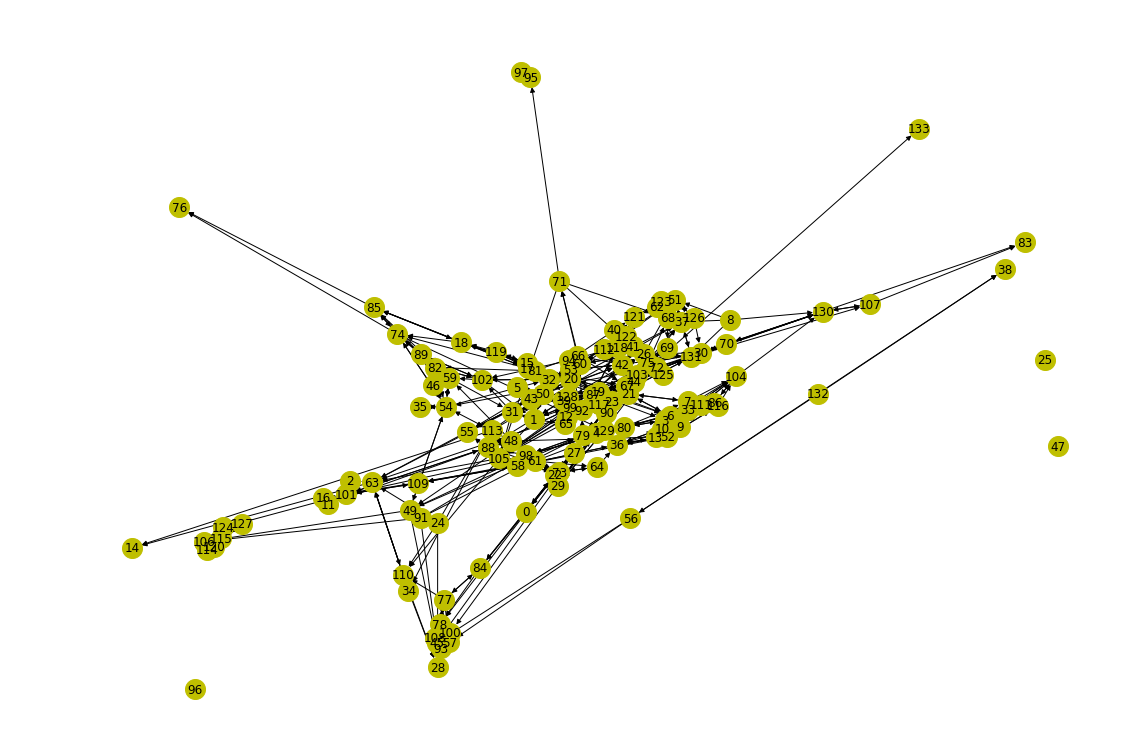

In [10]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g2) 
        
nx.draw(g2,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

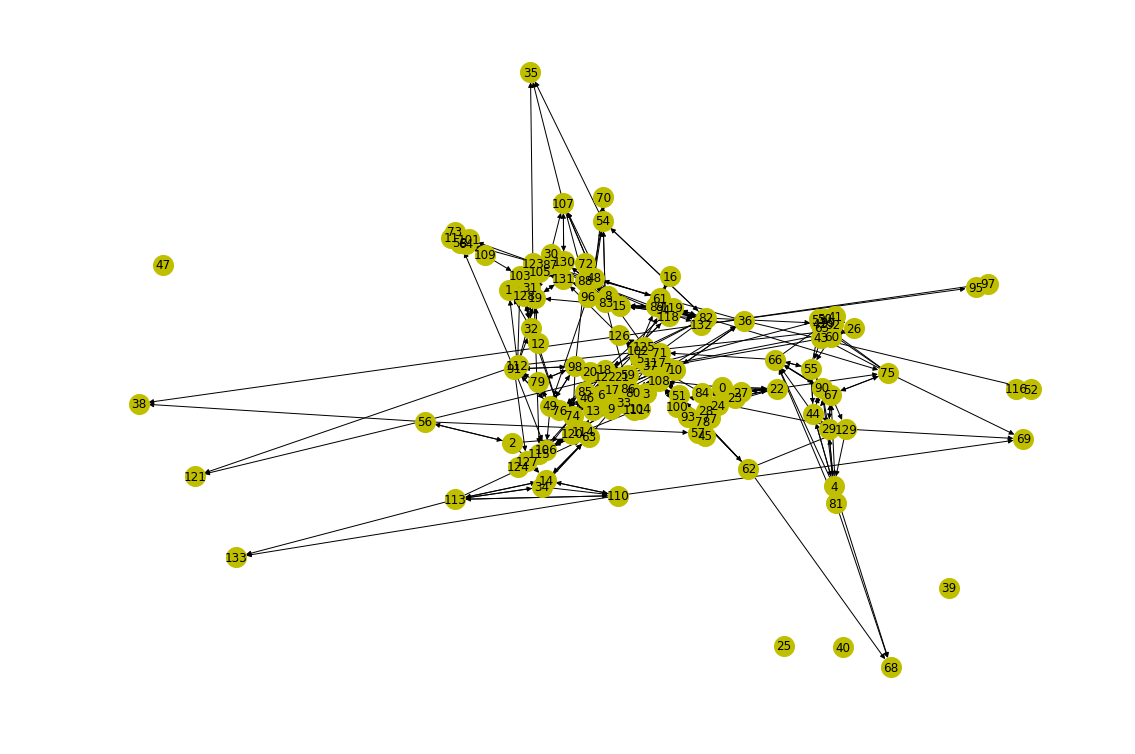

In [11]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(g3) 
        
nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)

#width = 1+10*np.array(list(networkx.get_edge_attributes(g,'weight').values())).ravel()
#edge_color = np.random.uniform(size=len(width))

#nx.draw_networkx_edges(g1,pos)#"grey")
#plt.title("A bizarre graph")
plt.axis("off")
plt.show()

# In-Degree

In [12]:
max_g1_in=np.max(list(dict(g1.in_degree()).values()))
mean_g1_in=np.mean(list(dict(g1.in_degree()).values()))
max_g2_in=np.max(list(dict(g2.in_degree()).values()))
mean_g2_in=np.mean(list(dict(g2.in_degree()).values()))
max_g3_in=np.max(list(dict(g3.in_degree()).values()))
mean_g3_in=np.mean(list(dict(g3.in_degree()).values()))
print('Max in degree 1:', max_g1_in,'Mean in degree 1:',mean_g1_in,'Max in degree 2:',max_g2_in,'Mean in degree 2:',mean_g2_in,'Max in degree 3:',max_g3_in,'Mean in degree 3:',mean_g3_in)

Max in degree 1: 11 Mean in degree 1: 3.470149253731343 Max in degree 2: 10 Mean in degree 2: 3.417910447761194 Max in degree 3: 10 Mean in degree 3: 3.656716417910448


In [24]:
max(dict(g1.in_degree()).values()) ,max(dict(g2.in_degree()).values()), max(dict(g3.in_degree()).values())


TypeError: 'int' object is not callable

In [73]:
max = 11 
min = 0
primero = dict(g1.in_degree())
segundo = dict(g2.in_degree())
tercero = dict(g3.in_degree())


#como son muchos valores vamos a tomar un criterio del tipo que si vale entre tales valores es influencer bajo, medio y alto 
#dict(g1.in_degree()).values()
#pensamos que cada uno puede elegir a 6 amigos
#influencer bajo 1, por debajo de la mitad de la que pueden elegir 
def influenciar(primero):
    for key, value in primero.items():
        if 0 <= value <= 6: 
            primero[key] = 1
        if 6 < value <= 7: 
            primero[key] = 2
        if 7 < value <= 11:
            primero[key] = 3
    return primero

In [74]:
np.max(list(dict(g1.out_degree()).values()))

6

In [75]:
primero = influenciar(primero)
segundo = influenciar(segundo)
tercero = influenciar(tercero)

In [76]:
#tengo los diccionarios segun el nivel de influencia 

In [77]:

def AssignConsumption(G,dict_level_consumption):
    for n in G.nodes:
        G.nodes[n]["consumption"] = dict_level_consumption[n]
    return


In [82]:
def color(g):
    if g==1:
        col='deepskyblue'
    elif g==2:                   # definimos una funcion para asignar un color distinto a cada genero
        col='aqua'
    elif g==3:                   # definimos una funcion para asignar un color distinto a cada genero
        col='crimson'
    return col


In [83]:
def size(g):
    base = 150
    if g==1:
        size=base*2
    elif g==2:                   # definimos una funcion para asignar un color distinto a cada genero
        size=base*6
    elif g==3:                   # definimos una funcion para asignar un color distinto a cada genero
        size= base*12
    return size


In [87]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

no = mlines.Line2D([], [], color='deepskyblue', marker='o', linestyle='None',
                          markersize=15, label='Influencia baja')
poco = mlines.Line2D([], [], color='aqua', marker='o', linestyle='None',
                          markersize=15, label='Influencia media')
medio = mlines.Line2D([], [], color='crimson', marker='o', linestyle='None',
                          markersize=15, label='Influencia alta')

              




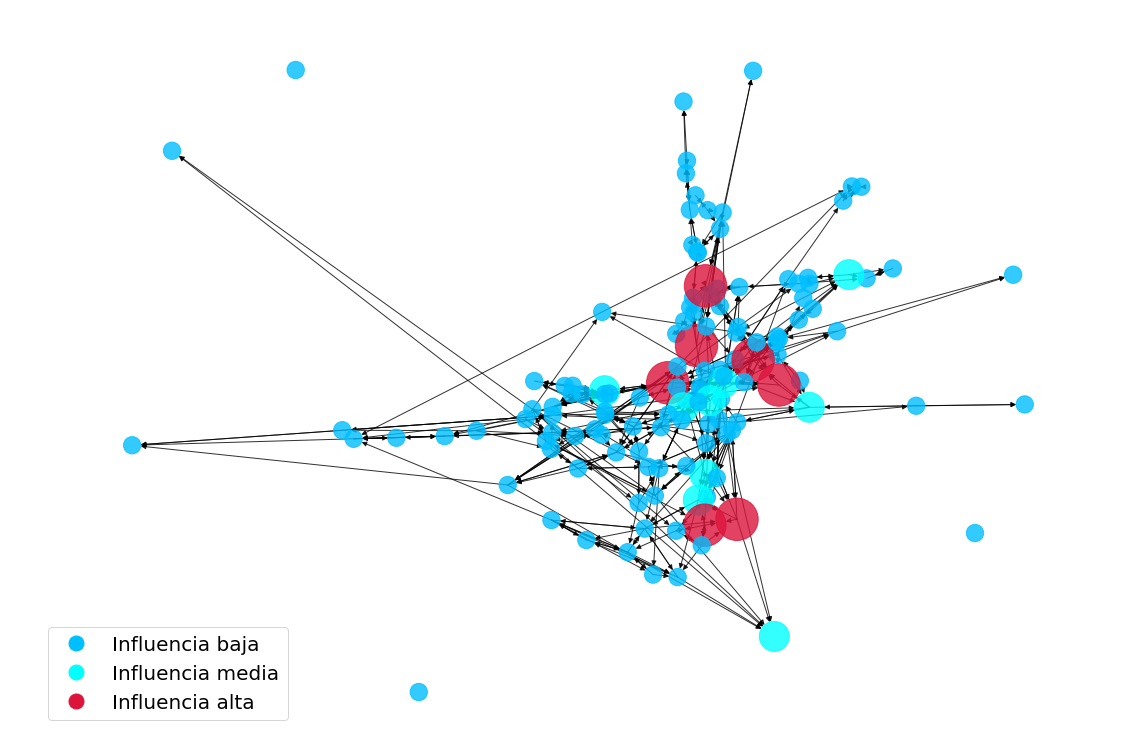

In [88]:
pos = nx.spring_layout(g1)  
AssignConsumption(g1,primero)        

plt.figure(figsize=(15,10))
#nx.draw_spring(g1, **options)

#nx.draw(g3,pos,node_size=400,node_color='y',with_labels=True)
#(G[, dim, k, pos, fixed, ...])
 


nx.draw(G = g1, 
        pos = pos, 
        node_list = g1.nodes(), 
        node_color = [color(g) for g in nx.get_node_attributes(g1,'consumption').values()], 
        alpha = 0.8, 
        edge_size = 0,
        node_size =[size(g) for g in nx.get_node_attributes(g1,'consumption').values()])

plt.legend(handles=[no,poco,medio],prop={'size': 20},loc=3)

plt.show()